# Introduction to Data Analysis with AI algorithms


# Machine learning worfklow

In [177]:
# Import required libraries
from pandas import read_csv
from matplotlib import pyplot as plt
%matplotlib inline

# Libraries needed for pre-processing and selecting a metric
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Libraries needed to build the neurral network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Data ingestion
- Transfer the data to your local environment in .csv format

In [161]:
# Define the location of the dataset
# You can download the data here: http://archive.ics.uci.edu/ml/datasets/Ionosphere

# Path to the data
DATA_FOLDER = 'data/ionosphere_csv.csv'

# Load the dataset in memory
df = read_csv(DATA_FOLDER, skiprows=1, header=None)

## Data validation

In [93]:
# Summarize shape
print(df.shape)

(351, 35)


In [94]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [179]:
# Show summary statistics
print(df.describe())

               0      1           2           3           4           5   \
count  351.000000  351.0  351.000000  351.000000  351.000000  351.000000   
mean     0.891738    0.0    0.641342    0.044372    0.601068    0.115889   
std      0.311155    0.0    0.497708    0.441435    0.519862    0.460810   
min      0.000000    0.0   -1.000000   -1.000000   -1.000000   -1.000000   
25%      1.000000    0.0    0.472135   -0.064735    0.412660   -0.024795   
50%      1.000000    0.0    0.871110    0.016310    0.809200    0.022800   
75%      1.000000    0.0    1.000000    0.194185    1.000000    0.334655   
max      1.000000    0.0    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          24  \
count  351.000000  351.000000  351.000000  351.000000  ...  351.000000   
mean     0.550095    0.119360    0.511848    0.181345  ...    0.396135   
std      0.492654    0.520750    0.507066    0.483851  ...    0.578451   
min     -1.000000  

## Data preparation

In [186]:
# Split the columns into input and output (answers) columns
X, y = df.values[:, :-1], df.values[:, -1]

# Convert all data to floating point values
X = X.astype('float32')

# Encode strings to integer
y = LabelEncoder().fit_transform(y)

# Split into train and test datasets - keep 40% of data as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

# Determine the number of input features
n_features = X.shape[1]

## Model selection

In [187]:
# Construct a neural network model

model = Sequential()
model.add(Dense(10, activation='relu',input_shape=(n_features,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy')

In [188]:
# Fit the model - only the training data
predictor = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0, 
                    validation_data=(X_test,y_test))

## Model validation

In [184]:
# Predict test set - using the test data (left out of the training dataset)
y_predicted = model.predict_classes(X_test)

# Evaluate predictions using the accuracy metric 
# ! Keep in mind that accuracy is a tricky metric. When it comes to multi-class classification or a heavily imbalanced
score = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {score:.3f}')

Accuracy: 0.915


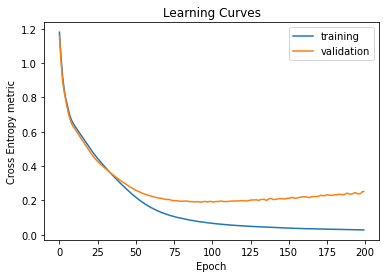

In [185]:
# Plot learning curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy metric')
plt.plot(predictor.history['loss'], label='training')
plt.plot(predictor.history['val_loss'], label='validation')
plt.legend()
plt.show()